In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [5]:
train = pd.read_csv("data/train.csv")

In [6]:
train.shape

(69999, 172)

In [7]:
train.shape

(69999, 172)

In [8]:
train.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [9]:
train.isna().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou

In [10]:
train.dtypes

id                            int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            

In [11]:
# Dropping not needed column
train = train.drop(['id', 'circle_id'], axis=1)

In [12]:
# Extract Day of month from date and fill that in same column and change object to int column
train['date_of_last_rech_6']= pd.to_datetime(train['date_of_last_rech_6'])
train['date_of_last_rech_6'] = train['date_of_last_rech_6'].dt.day
train['date_of_last_rech_6'] = train['date_of_last_rech_6'].fillna(0)
train['date_of_last_rech_6'] = train['date_of_last_rech_6'].astype(int)

train['date_of_last_rech_7']= pd.to_datetime(train['date_of_last_rech_7'])
train['date_of_last_rech_7'] = train['date_of_last_rech_7'].dt.day
train['date_of_last_rech_7'] = train['date_of_last_rech_7'].fillna(0)
train['date_of_last_rech_7'] = train['date_of_last_rech_7'].astype(int)

train['date_of_last_rech_8']= pd.to_datetime(train['date_of_last_rech_8'])
train['date_of_last_rech_8'] = train['date_of_last_rech_8'].dt.day
train['date_of_last_rech_8'] = train['date_of_last_rech_8'].fillna(0)
train['date_of_last_rech_8'] = train['date_of_last_rech_8'].astype(int)

train['date_of_last_rech_data_6']= pd.to_datetime(train['date_of_last_rech_data_6'])
train['date_of_last_rech_data_6'] = train['date_of_last_rech_data_6'].dt.day
train['date_of_last_rech_data_6'] = train['date_of_last_rech_data_6'].fillna(0)
train['date_of_last_rech_data_6'] = train['date_of_last_rech_data_6'].astype(int)

train['date_of_last_rech_data_7']= pd.to_datetime(train['date_of_last_rech_data_7'])
train['date_of_last_rech_data_7'] = train['date_of_last_rech_data_7'].dt.day
train['date_of_last_rech_data_7'] = train['date_of_last_rech_data_7'].fillna(0)
train['date_of_last_rech_data_7'] = train['date_of_last_rech_data_7'].astype(int)

train['date_of_last_rech_data_8']= pd.to_datetime(train['date_of_last_rech_data_8'])
train['date_of_last_rech_data_8'] = train['date_of_last_rech_data_8'].dt.day
train['date_of_last_rech_data_8'] = train['date_of_last_rech_data_8'].fillna(0)
train['date_of_last_rech_data_8'] = train['date_of_last_rech_data_8'].astype(int)

In [13]:
# Drop columns as they have unique value and will not be useful in analysis
train = train.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1)
train = train.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis=1)
train = train.drop(['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8'], axis=1)
train = train.drop(['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis=1)

In [14]:
train = train.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'})

In [15]:
train.shape

(69999, 158)

In [16]:
train.churn_probability.value_counts(normalize=True)

0    0.898113
1    0.101887
Name: churn_probability, dtype: float64

In [17]:
train.isna().sum()

arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou_7             2687
loc_og_t2m_mou_8             3703
loc_og_t2f_mou_6             2768
loc_og_t2f_mou_7             2687
loc_og_t2f_mou_8             3703
loc_og_t2c_mou_6             2768
loc_og_t2c_mou_7             2687
loc_og_t2c_mou_8             3703
loc_og_mou_6                 2768
loc_og_mou_7                 2687
loc_og_mou_8  

In [18]:
# Fill all na's with 0 as it could be that some have users joined network on 7 or 8 month. 
# Some have not used that specific service for that month 
train = train.fillna(0)

In [19]:
train.isna().sum()

arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_6            0
loc_og_t2f_mou_7            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_6            0
loc_og_t2c_mou_7            0
loc_og_t2c_mou_8            0
loc_og_mou_6                0
loc_og_mou_7                0
loc_og_mou_8                0
std_og_t2t_mou_6            0
std_og_t2t_mou_7            0
std_og_t2t_mou_8            0
std_og_t2m

In [20]:
train.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     283.134365    278.185912    278.858826    127.887939    128.754731   
std      334.213918    344.366927    351.924315    295.115497    306.326345   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      5.430000      4.910000   
50%      197.484000    191.588000    192.234000     30.830000     29.160000   
75%      370.791000    365.369500    369.909000    113.100000    108.940000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   
mean     125.943607    191.010582    189.585401    186.146273       9.379276   
std      304.990552    312.900706    318.492632    318.453812      56.260778   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.110000     28.790000     26.690000     23.780000       0.000000   
50%       27.840000     89.810000     85.590000     83.010000       0.000000   
75%      106.280000    223.540000    218.350000    216.410000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        6.745305       6.634328      13.625476       9.464386   
std        54.892940      51.999899      72.055036      57.409013   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   69999.000000      69999.000000      69999.000000      69999.000000   
mean        9.254848         45.050076         44.394344         43.269280   
std        62.923987        148.238746        151.998993        149.944829   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.010000          1.010000          0.760000   
50%         0.000000         10.660000         10.430000         10.060000   
75%         0.000000         38.680000         37.780000         37.260000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          89.551272         87.313796         86.301054          3.595161   
std          159.846546        151.875981        150.286404         13.073900   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.290000          7.530000          6.440000          0.000000   
50%           37.680000         37.010000         35.940000          0.000000   
75%          105.685000        103.330000        103.110000          1.860000   
max         4696.830000       4557.140000       4961.330000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           3.632045          3.467948          1.081499          1.308807   
std           13.324919         12.686917          5.631416          7.765132   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

In [21]:
#Mean of "Average revenue per user" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['arpu_6','arpu_7','arpu_8'].mean()

arpu_6      arpu_7      arpu_8
churn_probability                                    
0                  280.280668  284.891073  297.535694
1                  308.289067  219.081400  114.226380

In [22]:
#Mean of "All kind of calls within the same operator network -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['onnet_mou_6','onnet_mou_7','onnet_mou_8'].mean()

onnet_mou_6  onnet_mou_7  onnet_mou_8
churn_probability                                       
0                   123.475244   130.208978   134.589595
1                   166.784865   115.935868    49.731139

In [23]:
#Mean of "All kind of calls outside the operator T network -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['offnet_mou_6','offnet_mou_7','offnet_mou_8'].mean()

offnet_mou_6  offnet_mou_7  offnet_mou_8
churn_probability                                          
0                    189.023578    194.502932    200.198654
1                    208.525578    146.238458     62.277647

In [24]:
#Mean of "Indicates that customer is in roaming zone during the call -> Incoming calls -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'].mean()

roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
churn_probability                                             
0                       8.627277       5.749921       5.744561
1                      16.007982      15.519393      14.477426

In [25]:
#Mean of "Indicates that customer is in roaming zone during the call -> Outgoing calls -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'].mean()

roam_og_mou_6  roam_og_mou_7  roam_og_mou_8
churn_probability                                             
0                      12.381374       8.148038       8.016592
1                      24.591959      21.067705      20.169801

In [26]:
#Mean of "Local calls within same telecom circle -> Outgoing calls -> within same operator mobile to mobile -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'].mean()

loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8
churn_probability                                                      
0                         47.054445         47.447590         47.365118
1                         27.382006         17.480652          7.165370

In [27]:
#Mean of "Local calls within same telecom circle -> Outgoing calls -> Operator T to other operator mobile -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8'].mean()

loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8
churn_probability                                                      
0                         93.636935         93.122553         94.465803
1                         53.537061         36.110890         14.330600

In [28]:
#Sum of "Local calls within same telecom circle -> Outgoing calls -> Operator T to fixed lines of T -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8'].sum()

loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8
churn_probability                                                      
0                         239818.14         245026.05         238068.98
1                          11839.54           9213.45           4683.93

In [29]:
#Sum of "Local calls within same telecom circle -> Outgoing calls -> Operator T to its own call center -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8'].sum()

loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8
churn_probability                                                      
0                          68056.71          82145.41          90069.03
1                           7647.11           9469.74           4126.97

In [30]:
#Mean of "Local calls within same telecom circle -> Outgoing calls -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'].mean()

loc_og_mou_6  loc_og_mou_7  loc_og_mou_8
churn_probability                                          
0                    144.513335    144.475110    145.625253
1                     82.584096     54.887182     22.154563

In [31]:
train[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6']].corr()

loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
loc_og_t2t_mou_6          1.000000          0.269173          0.086370   
loc_og_t2m_mou_6          0.269173          1.000000          0.241016   
loc_og_t2f_mou_6          0.086370          0.241016          1.000000   
loc_og_t2c_mou_6          0.031467          0.031314          0.004591   
loc_og_mou_6              0.773953          0.816215          0.259081   

                  loc_og_t2c_mou_6  loc_og_mou_6  
loc_og_t2t_mou_6          0.031467      0.773953  
loc_og_t2m_mou_6          0.031314      0.816215  
loc_og_t2f_mou_6          0.004591      0.259081  
loc_og_t2c_mou_6          1.000000      0.039142  
loc_og_mou_6              0.039142      1.000000

In [32]:
#train = train.drop(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8'])
#train = train.drop(['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8'])
#train = train.drop(['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'])
#train = train.drop(['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8'])

In [33]:
#Mean of "STD calls  outside the calling circle -> Outgoing calls -> within same operator mobile to mobile -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8'].mean()

std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8
churn_probability                                                      
0                         71.573893         79.557237         84.188714
1                        129.064177         89.399222         33.810116

In [34]:
#Mean of "STD calls  outside the calling circle -> Outgoing calls -> Operator T to other operator mobile -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8'].mean()

std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8
churn_probability                                                      
0                         79.064583         87.463134         91.620660
1                        134.043940         92.975660         34.441896

In [35]:
#Sum of "STD calls  outside the calling circle -> Outgoing calls -> Operator T to fixed lines of T -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8'].sum()

std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8
churn_probability                                                      
0                          71631.77          69492.57          68861.86
1                           4095.68           3477.83           1261.99

In [36]:
#Sum of "STD calls  outside the calling circle -> Outgoing calls -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['std_og_mou_6','std_og_mou_7','std_og_mou_8'].sum()

std_og_mou_6  std_og_mou_7  std_og_mou_8
churn_probability                                          
0                    9541982.72   10569726.75   11121636.49
1                    1880604.56    1304191.96     488042.93

In [37]:
train[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6']].corr()

std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  \
std_og_t2t_mou_6          1.000000          0.180783         -0.010319   
std_og_t2m_mou_6          0.180783          1.000000          0.015782   
std_og_t2f_mou_6         -0.010319          0.015782          1.000000   
std_og_mou_6              0.767133          0.769275          0.024266   

                  std_og_mou_6  
std_og_t2t_mou_6      0.767133  
std_og_t2m_mou_6      0.769275  
std_og_t2f_mou_6      0.024266  
std_og_mou_6          1.000000

In [38]:
#train = train.drop(['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8'])
#train = train.drop(['std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8'])
#train = train.drop(['std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8'])

In [39]:
#Sum of "ISD calls -> Outgoing calls -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8'].sum()

isd_og_mou_6  isd_og_mou_7  isd_og_mou_8
churn_probability                                          
0                      46822.09      48370.45      52078.89
1                      10039.42       6226.28       3719.03

In [40]:
#Sum of "Special calls -> Outgoing calls -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8'].sum()

spl_og_mou_6  spl_og_mou_7  spl_og_mou_8
churn_probability                                          
0                     236695.03     304780.29     323654.45
1                      29446.89      30216.95      10810.68

In [41]:
#Sum of "Outgoing calls -> other" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['og_others_6','og_others_7','og_others_8'].sum()

og_others_6  og_others_7  og_others_8
churn_probability                                       
0                     27123.56      1568.15      2187.87
1                      3976.22        75.93         3.78

In [42]:
#Sum of " Total Outgoing calls -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

total_og_mou_6  total_og_mou_7  total_og_mou_8
churn_probability                                                
0                      301.242079      318.252422      328.550893
1                      352.370766      242.877399       92.624937

In [43]:
train[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6']].corr()

isd_og_mou_6  spl_og_mou_6  og_others_6  total_og_mou_6
isd_og_mou_6        1.000000      0.002064     0.000904        0.062380
spl_og_mou_6        0.002064      1.000000     0.141583        0.154994
og_others_6         0.000904      0.141583     1.000000        0.066537
total_og_mou_6      0.062380      0.154994     0.066537        1.000000

In [44]:
#Sum of "Local calls  within same telecom circle -> incoming calls -> within same operator mobile to mobile -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8'].mean()

loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8
churn_probability                                                      
0                         47.932379         48.794878         48.966170
1                         30.374544         21.802458          7.649083

In [45]:
#Sum of "Local calls  within same telecom circle -> incoming calls -> Operator T to other operator mobile -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8'].mean()

loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8
churn_probability                                                      
0                        107.541525        109.337261        112.169083
1                         62.135808         41.270276         16.614169

In [46]:
#Sum of "Local calls  within same telecom circle -> incoming calls -> Operator T to fixed lines of T -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8'].sum()

loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8
churn_probability                                                      
0                         773131.24         819565.36         767310.60
1                          37047.51          26120.03           9463.95

In [47]:
#Sum of "Local calls  within same telecom circle -> incoming calls -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8'].mean()

loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8
churn_probability                                          
0                    167.780504    171.177604    173.349661
1                     97.710658     66.739523     25.592482

In [48]:
train[['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].corr()

loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
loc_ic_t2t_mou_6          1.000000          0.219863          0.096594   
loc_ic_t2m_mou_6          0.219863          1.000000          0.230332   
loc_ic_t2f_mou_6          0.096594          0.230332          1.000000   
loc_ic_mou_6              0.714297          0.823757          0.361925   

                  loc_ic_mou_6  
loc_ic_t2t_mou_6      0.714297  
loc_ic_t2m_mou_6      0.823757  
loc_ic_t2f_mou_6      0.361925  
loc_ic_mou_6          1.000000

In [49]:
#train = train.drop(['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8'])
#train = train.drop(['loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8'])
#train = train.drop(['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'])

In [50]:
#Sum of "STD calls  outside the calling circle -> incoming calls -> within same operator mobile to mobile -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8'].sum()

std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8
churn_probability                                                      
0                         560623.25         607109.51         636049.71
1                          76522.10          57493.34          20958.02

In [51]:
#Sum of "STD calls  outside the calling circle -> incoming calls -> Operator T to other operator mobile -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8'].sum()

std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8
churn_probability                                                      
0                        1243777.51        1360889.21        1357614.19
1                         150247.75          98795.67          40504.91

In [52]:
#Sum of "STD calls  outside the calling circle -> incoming calls -> Operator T to fixed lines of T -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8'].sum()

std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8
churn_probability                                                      
0                         136627.12         143036.53         135895.48
1                           7668.93           5009.13           1680.62

In [53]:
#Sum of "STD calls  outside the calling circle -> incoming calls -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8'].sum()

std_ic_mou_6  std_ic_mou_7  std_ic_mou_8
churn_probability                                          
0                    1941181.64    2111196.48    2129725.50
1                     234456.04     161311.12      63149.31

In [54]:
train[['std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_8']].corr()

std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
std_ic_t2t_mou_6          1.000000          0.148241          0.059581   
std_ic_t2m_mou_6          0.148241          1.000000          0.072362   
std_ic_t2f_mou_6          0.059581          0.072362          1.000000   
std_ic_mou_8              0.367529          0.482438          0.155331   

                  std_ic_mou_8  
std_ic_t2t_mou_6      0.367529  
std_ic_t2m_mou_6      0.482438  
std_ic_t2f_mou_6      0.155331  
std_ic_mou_8          1.000000

In [55]:
#Sum of "total incoming calls -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
churn_probability                                                
0                      206.643635      213.892542      216.701665
1                      138.597825       95.972761       37.919282

In [56]:
#Sum of "Special calls -> incoming calls -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8'].sum()

spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8
churn_probability                                          
0                       3842.61       2109.34       2652.97
1                        321.12        136.90         24.83

In [57]:
#Sum of "ISD calls -> incoming calls -> Minutes of usage voice calls" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8'].sum()

isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8
churn_probability                                          
0                     444666.84     506861.92     530261.06
1                      52450.39      43155.31      23206.03

In [58]:
#Sum of "incoming calls -> other" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['ic_others_6','ic_others_7','ic_others_8'].sum()

ic_others_6  ic_others_7  ic_others_8
churn_probability                                       
0                     53081.82     64778.68     62336.84
1                      4337.71      3858.05      1520.38

In [59]:
#Sum of "total recharge number" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['total_rech_num_6','total_rech_num_7','total_rech_num_8'].mean()

total_rech_num_6  total_rech_num_7  total_rech_num_8
churn_probability                                                      
0                          7.504939          7.856173          7.629774
1                          8.109366          6.388811          3.656338

In [60]:
#Sum of "total recharge amount" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
churn_probability                                                      
0                        325.570888        331.234352        346.878712
1                        350.784072        244.295149        120.821228

In [61]:
#Sum of "max recharge amount" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'].mean()

max_rech_amt_6  max_rech_amt_7  max_rech_amt_8
churn_probability                                                
0                      105.182353      107.122194      114.207724
1                       99.165031       77.828800       48.768929

In [62]:
#Sum of "date of last recharge" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'].median()

date_of_last_rech_6  date_of_last_rech_7  \
churn_probability                                             
0                                 27.0                 27.0   
1                                 26.0                 25.0   

                   date_of_last_rech_8  
churn_probability                       
0                                 27.0  
1                                 24.0

In [63]:
#Sum of "last day recharge amount" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'].mean()

last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8
churn_probability                                                            
0                           64.124676           61.537563           67.285667
1                           57.276640           39.519630           20.212142

In [64]:
#Sum of "date of last recharge for data" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'].mean()

date_of_last_rech_data_6  date_of_last_rech_data_7  \
churn_probability                                                       
0                                  4.877901                  5.295067   
1                                  3.917555                  2.860488   

                   date_of_last_rech_data_8  
churn_probability                            
0                                  5.563062  
1                                  1.331744

In [65]:
#Sum of "total recharge data" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['total_rech_data_6','total_rech_data_7','total_rech_data_8'].sum()

total_rech_data_6  total_rech_data_7  total_rech_data_8
churn_probability                                                         
0                            39578.0            44891.0            47656.0
1                             3773.0             2987.0             1194.0

In [66]:
#Sum of "max recharge data" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['max_rech_data_6','max_rech_data_7','max_rech_data_8'].mean()

max_rech_data_6  max_rech_data_7  max_rech_data_8
churn_probability                                                   
0                        32.401626        33.653586        35.518587
1                        25.989764        19.976584        10.667835

In [67]:
#Sum of "2g recharge count" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8'].sum()

count_rech_2g_6  count_rech_2g_7  count_rech_2g_8
churn_probability                                                   
0                          30005.0          34534.0          36287.0
1                           2765.0           2202.0            842.0

In [68]:
#Sum of "3g recharge count" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'].sum()

count_rech_3g_6  count_rech_3g_7  count_rech_3g_8
churn_probability                                                   
0                           9573.0          10357.0          11369.0
1                           1008.0            785.0            352.0

In [69]:
#Sum of "avg recharge amount data" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'].mean()

av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8
churn_probability                                                            
0                           49.552749           53.879732           56.071184
1                           38.197420           29.690583           13.983361

In [70]:
#Sum of "Mobile internet usage volume in MB -> 2g" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean()

vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
churn_probability                                       
0                    52.993459    53.696628    54.559777
1                    41.023999    29.587367    11.058022

In [71]:
#Sum of "Mobile internet usage volume in MB -> 3g" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].mean()

vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8
churn_probability                                       
0                   124.938010   135.722042   146.931172
1                    97.789079    69.103268    34.604651

In [72]:
#Sum of "Average revenue per user -> 3g" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['arpu_3g_6','arpu_3g_7','arpu_3g_8'].mean()

arpu_3g_6  arpu_3g_7  arpu_3g_8
churn_probability                                 
0                  22.784535  23.588834   25.61194
1                  21.025404  15.296405    8.24120

In [73]:
#Sum of "Average revenue per user -> 2g" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['arpu_2g_6','arpu_2g_7','arpu_2g_8'].mean()

arpu_2g_6  arpu_2g_7  arpu_2g_8
churn_probability                                 
0                  21.977586  22.647536  24.394413
1                  20.241185  15.403460   7.946576

In [74]:
#Sum of "Scheme to use during specific night hours only -> pack user" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['night_pck_user_6','night_pck_user_7','night_pck_user_8'].sum()

night_pck_user_6  night_pck_user_7  night_pck_user_8
churn_probability                                                      
0                             389.0             402.0             375.0
1                              55.0              28.0              12.0

In [75]:
#Sum of "Service schemes with validity equivalent to a month -> 2g" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['monthly_2g_6','monthly_2g_7','monthly_2g_8'].sum()

monthly_2g_6  monthly_2g_7  monthly_2g_8
churn_probability                                          
0                          5231          5621          5571
1                           319           217            94

In [76]:
#Sum of "Service schemes with validity smaller than a month -> 2g" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['sachet_2g_6','sachet_2g_7','sachet_2g_8'].sum()

sachet_2g_6  sachet_2g_7  sachet_2g_8
churn_probability                                       
0                        24774        28913        30716
1                         2446         1985          748

In [77]:
#Sum of "Service schemes with validity equivalent to a month -> 3g" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['monthly_3g_6','monthly_3g_7','monthly_3g_8'].sum()

monthly_3g_6  monthly_3g_7  monthly_3g_8
churn_probability                                          
0                          4825          5087          5543
1                           482           354           194

In [78]:
#Sum of "Service schemes with validity smaller than a month -> 3g" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['sachet_3g_6','sachet_3g_7','sachet_3g_8'].sum()

sachet_3g_6  sachet_3g_7  sachet_3g_8
churn_probability                                       
0                         4748         5270         5826
1                          526          431          158

In [79]:
#Sum of "Service scheme to avail services of Facebook and similar social networking sites" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['fb_user_6','fb_user_7','fb_user_8'].sum()

fb_user_6  fb_user_7  fb_user_8
churn_probability                                 
0                    14748.0    15217.0    15911.0
1                     1350.0     1032.0      486.0

In [80]:
#Sum of "Age on network number of days the customer is using the operator T network", churn vs Non-Churn
train.groupby(['churn_probability'])['aon'].median()

churn_probability
0    925.0
1    570.5
Name: aon, dtype: float64

In [81]:
#Sum of "Volume based cost  when no specific scheme is not purchased and paid as per usage" per month, churn vs Non-Churn
train.groupby(['churn_probability'])['vbc_3g_6','vbc_3g_7','vbc_3g_8'].mean()

vbc_3g_6   vbc_3g_7   vbc_3g_8
churn_probability                                 
0                  62.032521  69.554308  73.827215
1                  42.836966  34.039739  17.700251

### For churned customers -> as we move from month 6 -> 7 -> 8 month, recharge amount, average revenue, data usage, incoming/outgoing call minutes all decreases.

## So if there are any customer for which you observe this behaviour then there is high chance that they will get churn in near future

In [82]:
# Revenue from the customer being the most important factor, lets remove outlier customers based revenue
# We can also remove based on data usage or call usage, but I am removing here based on revenue

# There can be many variables based on which we can remove outliers:
   # arpu_
   # total_rech_amt_
   # max_rech_amt_
   # av_rech_amt_data_
# I am considering arpu_8 here and using mean +- 3 SD

train.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean     283.134365    278.185912    278.858826    127.887939    128.754731   
std      334.213918    344.366927    351.924315    295.115497    306.326345   
min    -2258.709000  -1289.715000   -945.808000      0.000000      0.000000   
25%       93.581000     86.714000     84.095000      5.430000      4.910000   
50%      197.484000    191.588000    192.234000     30.830000     29.160000   
75%      370.791000    365.369500    369.909000    113.100000    108.940000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000   69999.000000   
mean     125.943607    191.010582    189.585401    186.146273       9.379276   
std      304.990552    312.900706    318.492632    318.453812      56.260778   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.110000     28.790000     26.690000     23.780000       0.000000   
50%       27.840000     89.810000     85.590000     83.010000       0.000000   
75%      106.280000    223.540000    218.350000    216.410000       0.000000   
max    10752.560000   8362.360000   7043.980000  14007.340000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   69999.000000   69999.000000   69999.000000   69999.000000   
mean        6.745305       6.634328      13.625476       9.464386   
std        54.892940      51.999899      72.055036      57.409013   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   69999.000000      69999.000000      69999.000000      69999.000000   
mean        9.254848         45.050076         44.394344         43.269280   
std        62.923987        148.238746        151.998993        149.944829   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          1.010000          1.010000          0.760000   
50%         0.000000         10.660000         10.430000         10.060000   
75%         0.000000         38.680000         37.780000         37.260000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean          89.551272         87.313796         86.301054          3.595161   
std          159.846546        151.875981        150.286404         13.073900   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.290000          7.530000          6.440000          0.000000   
50%           37.680000         37.010000         35.940000          0.000000   
75%          105.685000        103.330000        103.110000          1.860000   
max         4696.830000       4557.140000       4961.330000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           3.632045          3.467948          1.081499          1.308807   
std           13.324919         12.686917          5.631416          7.765132   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

In [83]:
train_after_removing_outliers = train[(train.arpu_6 >= (train.arpu_6.mean() - 3 * train.arpu_6.std())) & (train.arpu_6 <= (train.arpu_6.mean() + 3 * train.arpu_6.std()))]

In [84]:
train_after_removing_outliers.shape

(69053, 158)

In [85]:
train_after_removing_outliers.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  69053.000000  69053.000000  69053.000000  69053.000000  69053.000000   
mean     261.753835    262.600383    264.930018    118.883347    121.961330   
std      236.830633    263.342184    272.518141    256.432322    280.086939   
min     -383.565000  -1289.715000   -491.545000      0.000000      0.000000   
25%       92.234000     85.725000     83.247000      5.260000      4.760000   
50%      194.043000    188.807000    189.774000     30.060000     28.530000   
75%      360.098000    356.679000    361.475000    109.160000    105.780000   
max     1284.353000   6453.689000   6255.086000   6109.080000   8011.910000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  69053.000000  69053.000000  69053.000000  69053.000000   69053.000000   
mean     120.305027    177.033798    179.015849    177.851369       8.738026   
std      278.916930    260.785518    283.156339    293.131788      52.938714   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        4.030000     28.260000     26.230000     23.430000       0.000000   
50%       27.340000     87.930000     84.030000     81.630000       0.000000   
75%      103.340000    215.680000    211.540000    210.690000       0.000000   
max     6767.680000   3578.690000   5639.990000  14007.340000    2850.980000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   69053.000000   69053.000000   69053.000000   69053.000000   
mean        6.348699       6.232224      11.940195       8.502008   
std        53.194013      50.193944      56.145287      49.173900   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4155.830000    4169.810000    1667.630000    1647.760000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   69053.000000      69053.000000      69053.000000      69053.000000   
mean        8.283398         42.961570         42.524026         41.426652   
std        51.824334        137.722087        141.945238        131.964730   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          0.960000          0.980000          0.750000   
50%         0.000000         10.430000         10.210000          9.910000   
75%         0.000000         37.680000         36.940000         36.540000   
max      3493.360000       6093.340000       6371.980000       5263.860000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      69053.000000      69053.000000      69053.000000      69053.000000   
mean          84.923177         83.637717         83.249152          3.420660   
std          139.367232        138.419945        139.574680         11.858062   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.090000          7.410000          6.340000          0.000000   
50%           36.990000         36.390000         35.460000          0.000000   
75%          103.340000        101.130000        101.360000          1.790000   
max         2429.890000       2737.180000       3547.130000        617.580000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      69053.000000      69053.000000      69053.000000      69053.000000   
mean           3.479270          3.336067          1.058367          1.288459   
std           12.273075         11.844328          5.518896          7.499132   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.0000

In [86]:
y_train = train_after_removing_outliers.pop('churn_probability')
X_train = train_after_removing_outliers

<AxesSubplot:xlabel='arpu_6', ylabel='Density'>

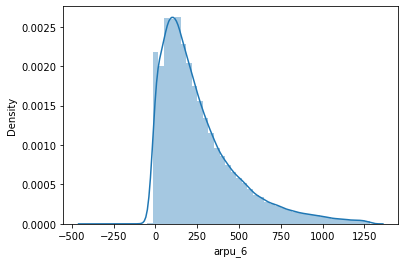

In [87]:
sns.distplot(X_train.arpu_6)

In [88]:
#perform oversampling using smote
oversample = SMOTE()
X_train_smo, y_train_smo = oversample.fit_resample(X_train, y_train)

In [89]:
y_train_backup = y_train

In [90]:
X_train_smo.shape, y_train_smo.shape

((124118, 157), (124118,))

In [91]:
y_train = y_train_smo

In [92]:
#Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smo)
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=X_train.columns)

### Working on test Data

In [93]:
test = pd.read_csv("data/test.csv")

In [94]:
test_id = test['id']

In [95]:
test = test.drop(['id', 'circle_id'], axis=1)

In [96]:
# Extract Day of month from date and fill na values with 0
test['date_of_last_rech_6']= pd.to_datetime(test['date_of_last_rech_6'])
test['date_of_last_rech_6'] = test['date_of_last_rech_6'].dt.day
test['date_of_last_rech_6'] = test['date_of_last_rech_6'].fillna(0)
test['date_of_last_rech_6'] = test['date_of_last_rech_6'].astype(int)

test['date_of_last_rech_7']= pd.to_datetime(test['date_of_last_rech_7'])
test['date_of_last_rech_7'] = test['date_of_last_rech_7'].dt.day
test['date_of_last_rech_7'] = test['date_of_last_rech_7'].fillna(0)
test['date_of_last_rech_7'] = test['date_of_last_rech_7'].astype(int)

test['date_of_last_rech_8']= pd.to_datetime(test['date_of_last_rech_8'])
test['date_of_last_rech_8'] = test['date_of_last_rech_8'].dt.day
test['date_of_last_rech_8'] = test['date_of_last_rech_8'].fillna(0)
test['date_of_last_rech_8'] = test['date_of_last_rech_8'].astype(int)

test['date_of_last_rech_data_6']= pd.to_datetime(test['date_of_last_rech_data_6'])
test['date_of_last_rech_data_6'] = test['date_of_last_rech_data_6'].dt.day
test['date_of_last_rech_data_6'] = test['date_of_last_rech_data_6'].fillna(0)
test['date_of_last_rech_data_6'] = test['date_of_last_rech_data_6'].astype(int)

test['date_of_last_rech_data_7']= pd.to_datetime(test['date_of_last_rech_data_7'])
test['date_of_last_rech_data_7'] = test['date_of_last_rech_data_7'].dt.day
test['date_of_last_rech_data_7'] = test['date_of_last_rech_data_7'].fillna(0)
test['date_of_last_rech_data_7'] = test['date_of_last_rech_data_7'].astype(int)

test['date_of_last_rech_data_8']= pd.to_datetime(test['date_of_last_rech_data_8'])
test['date_of_last_rech_data_8'] = test['date_of_last_rech_data_8'].dt.day
test['date_of_last_rech_data_8'] = test['date_of_last_rech_data_8'].fillna(0)
test['date_of_last_rech_data_8'] = test['date_of_last_rech_data_8'].astype(int)

In [97]:
# Drop columns as they have unique value and will not be useful in analysis
test = test.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1)
test = test.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis=1)
test = test.drop(['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8'], axis=1)
test = test.drop(['std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis=1)

In [98]:
test = test.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'})

In [99]:
test = test.fillna(0)

In [100]:
X_test_scaled = scaler.transform(test)
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns=test.columns)

### Logistic Regression

In [101]:
logreg = LogisticRegression()

In [102]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [103]:
y_train_pred_logreg = logreg.predict(X_train_scaled)

In [104]:
confusion_matrix(y_train, y_train_pred_logreg)

array([[53990,  8069],
       [ 5844, 56215]], dtype=int64)

In [105]:
accuracy_score(y_train, y_train_pred_logreg)

0.8879050580898822

In [106]:
precision_score(y_train, y_train_pred_logreg)

0.874478874992222

In [107]:
recall_score(y_train, y_train_pred_logreg)

0.9058315473984434

In [108]:
f1_score(y_train, y_train_pred_logreg)

0.8898791385355738

### RFE

In [109]:
cols = list(X_train.columns)
len(cols)

157

In [110]:
logreg1 = LogisticRegression()

In [111]:
rfe = RFE(logreg1, n_features_to_select=120) 
train_rfe = rfe.fit_transform(X_train_scaled, y_train)

In [112]:
logreg1.fit(train_rfe,y_train)

LogisticRegression()

In [113]:
y_rfe_pred = logreg1.predict(train_rfe)

In [114]:
confusion_matrix(y_train, y_rfe_pred)

array([[54028,  8031],
       [ 5882, 56177]], dtype=int64)

In [115]:
accuracy_score(y_train, y_rfe_pred)

0.8879050580898822

In [116]:
precision_score(y_train, y_rfe_pred)

0.8749221280837279

In [117]:
recall_score(y_train, y_rfe_pred)

0.9052192268647578

In [118]:
f1_score(y_train, y_rfe_pred)

0.8898128568826377

In [119]:
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7'],
      dtype='object', length=120)


In [120]:
#Build a linear model
X_train_lm = sm.add_constant(X_train_scaled[selected_features_rfe])

lr = sm.OLS(list(y_train), X_train_lm)
lr_model = lr.fit()
# Check the summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     1347.
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:12:59   Log-Likelihood:                -39187.
No. Observations:              124118   AIC:                         7.861e+04
Df Residuals:                  124000   BIC:                         7.976e+04
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Decision Tree Classifier

In [121]:
dec_tree = DecisionTreeClassifier()

In [122]:
params = {
    "max_depth": [5,10,20,25,30,35],
    "min_samples_leaf": [20,50,100,200,500]
}

In [123]:
grid_search = GridSearchCV(estimator=dec_tree,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [124]:
%%time
grid_search.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Wall time: 3min 50s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 25, 30, 35],
                         'min_samples_leaf': [20, 50, 100, 200, 500]},
             scoring='accuracy', verbose=1)

In [125]:
grid_search.best_score_

0.9087483095533793

In [126]:
dec_tree_best = grid_search.best_estimator_
dec_tree_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=20)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.270708 to fit



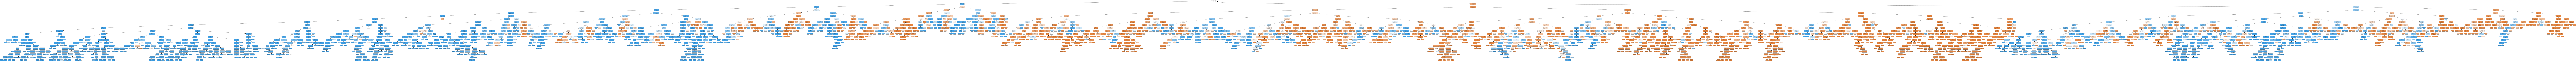

In [127]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dec_tree_best, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train_scaled.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [128]:
X_train_scaled_pred = dec_tree_best.predict(X_train_scaled)

In [129]:
confusion_matrix(y_train, X_train_scaled_pred)

array([[58141,  3918],
       [ 3470, 58589]], dtype=int64)

In [130]:
accuracy_score(y_train, X_train_scaled_pred)

0.9404759986464494

In [131]:
precision_score(y_train, X_train_scaled_pred)

0.9373190202697298

In [132]:
recall_score(y_train, X_train_scaled_pred)

0.944085467055544

In [133]:
f1_score(y_train, X_train_scaled_pred)

0.9406900759436765

In [134]:
imp_df = pd.DataFrame({
    "Varname": X_train_scaled.columns,
    "Imp": dec_tree_best.feature_importances_
})

In [135]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
80             total_ic_mou_8  0.501081
14              roam_og_mou_8  0.142751
101       date_of_last_rech_8  0.046321
152                 fb_user_8  0.033442
104        last_day_rch_amt_8  0.028708
95           total_rech_amt_8  0.019317
46               spl_og_mou_7  0.019042
53             total_og_mou_8  0.017891
98             max_rech_amt_8  0.014943
65               loc_ic_mou_8  0.012284
1                      arpu_7  0.009114
59           loc_ic_t2m_mou_8  0.009006
103        last_day_rch_amt_7  0.006461
83               spl_ic_mou_8  0.005150
153                       aon  0.004399
99        date_of_last_rech_6  0.004034
79             total_ic_mou_7  0.003847
113           max_rech_data_8  0.003734
102        last_day_rch_amt_6  0.003445
11              roam_ic_mou_8  0.003232
40               std_og_mou_7  0.003124
90           total_rech_num_6  0.003030
64               loc_ic_mou_7  0.002702
44               isd_og_mou_8  0.002562
70           std_ic_t2m_mou_7  0.002516
10              roam_ic_mou_7  0.002277
6                offnet_mou_6  0.002255
47               spl_og_mou_8  0.002236
57           loc_ic_t2m_mou_6  0.002030
34           std_og_t2m_mou_7  0.002000
19           loc_og_t2m_mou_7  0.001987
58           loc_ic_t2m_mou_7  0.001959
0                      arpu_6  0.001949
78             total_ic_mou_6  0.001912
100       date_of_last_rech_7  0.001903
94           total_rech_amt_7  0.001871
29               loc_og_mou_8  0.001790
56           loc_ic_t2t_mou_8  0.001705
61           loc_ic_t2f_mou_7  0.001704
93           total_rech_amt_6  0.001672
97             max_rech_amt_7  0.001654
2                      arpu_8  0.001617
45               spl_og_mou_6  0.001502
96             max_rech_amt_6  0.001492
13              roam_og_mou_7  0.001489
107  date_of_last_rech_data_8  0.001479
16           loc_og_t2t_mou_7  0.001459
20           loc_og_t2m_mou_8  0.001424
41               std_og_mou_8  0.001420
60           loc_ic_t2f_mou_6  0.001417
77               std_ic_mou_8  0.001417
154                  vbc_3g_8  0.001415
55           loc_ic_t2t_mou_7  0.001386
33           std_og_t2m_mou_6  0.001315
114           count_rech_2g_6  0.001299
85               isd_ic_mou_7  0.001205
54           loc_ic_t2t_mou_6  0.001165
30           std_og_t2t_mou_6  0.001143
39               std_og_mou_6  0.001121
69           std_ic_t2m_mou_6  0.001112
31           std_og_t2t_mou_7  0.001062
67           std_ic_t2t_mou_7  0.001060
73           std_ic_t2f_mou_7  0.001048
86               isd_ic_mou_8  0.001031
51             total_og_mou_6  0.000995
62           loc_ic_t2f_mou_8  0.000988
32           std_og_t2t_mou_8  0.000957
5                 onnet_mou_8  0.000957
24           loc_og_t2c_mou_6  0.000921
151                 fb_user_7  0.000908
15           loc_og_t2t_mou_6  0.000892
7                offnet_mou_7  0.000890
91           total_rech_num_7  0.000869
3                 onnet_mou_6  0.000856
26           loc_og_t2c_mou_8  0.000838
23           loc_og_t2f_mou_8  0.000835
82               spl_ic_mou_7  0.000828
109         total_rech_data_7  0.000819
92           total_rech_num_8  0.000818
133                 arpu_2g_7  0.000816
81               spl_ic_mou_6  0.000800
128               vol_3g_mb_8  0.000788
117           count_rech_3g_6  0.000732
28               loc_og_mou_7  0.000727
84               isd_ic_mou_6  0.000726
71           std_ic_t2m_mou_8  0.000696
52             total_og_mou_7  0.000695
110         total_rech_data_8  0.000663
22           loc_og_t2f_mou_7  0.000657
8                offnet_mou_8  0.000653
63               loc_ic_mou_6  0.000652
66           std_ic_t2t_mou_6  0.000650
68           std_ic_t2t_mou_8  0.000623
42               isd_og_mou_6  0.000619
75               std_ic_mou_6  0.000612
12              roam_og_mou_6  0.000574
18           loc_og_t2m_mou_6  0.000556
129                 arpu_3g_6  0.000544
17           loc_og_t2t_mou_8  0.000538
21           loc_og_t2

#### Variables of high important are:
* total_ic_mou_8
* roam_og_mou_8
* date_of_last_rech_8
* fb_user_8
* last_day_rch_amt_8
* total_rech_amt_8

#### All the variables which are of 8th month (revenue, recharge, data) are most important

### Random Forest Classifier

In [136]:
rand_for = RandomForestClassifier()

In [137]:
params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [20,50,100,500],
    'n_estimators': [10, 25, 50]
}

In [138]:
grid_search = GridSearchCV(estimator=rand_for,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [139]:
%%time
grid_search.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Wall time: 6min 59s


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [20, 50, 100, 500],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy', verbose=1)

In [140]:
grid_search.best_score_

0.9290353946435002

In [141]:
rand_for_best = grid_search.best_estimator_
rand_for_best

RandomForestClassifier(max_depth=20, min_samples_leaf=20, n_estimators=50)

In [142]:
y_scaled_pred = rand_for_best.predict(X_train_scaled)

In [143]:
confusion_matrix(y_train, y_scaled_pred)

array([[58843,  3216],
       [ 3181, 58878]], dtype=int64)

In [144]:
accuracy_score(y_train, y_scaled_pred)

0.9484603361317456

In [145]:
precision_score(y_train, y_scaled_pred)

0.9482075562856315

In [146]:
recall_score(y_train, y_scaled_pred)

0.9487423258512061

In [147]:
f1_score(y_train, y_scaled_pred)

0.9484748656899148

In [148]:
imp_df = pd.DataFrame({
    "Varname": X_train_scaled.columns,
    "Imp": rand_for_best.feature_importances_
})

In [149]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
53             total_og_mou_8  0.083772
80             total_ic_mou_8  0.077294
65               loc_ic_mou_8  0.073641
11              roam_ic_mou_8  0.059126
14              roam_og_mou_8  0.053607
59           loc_ic_t2m_mou_8  0.050271
20           loc_og_t2m_mou_8  0.040778
2                      arpu_8  0.040661
98             max_rech_amt_8  0.039275
29               loc_og_mou_8  0.037880
101       date_of_last_rech_8  0.033529
17           loc_og_t2t_mou_8  0.030834
104        last_day_rch_amt_8  0.026175
8                offnet_mou_8  0.025536
92           total_rech_num_8  0.015139
77               std_ic_mou_8  0.013284
46               spl_og_mou_7  0.010527
56           loc_ic_t2t_mou_8  0.010307
10              roam_ic_mou_7  0.009520
152                 fb_user_8  0.009043
5                 onnet_mou_8  0.008509
64               loc_ic_mou_7  0.008112
95           total_rech_amt_8  0.007810
79             total_ic_mou_7  0.007243
62           loc_ic_t2f_mou_8  0.006616
107  date_of_last_rech_data_8  0.006447
41               std_og_mou_8  0.006403
52             total_og_mou_7  0.005088
1                      arpu_7  0.004926
55           loc_ic_t2t_mou_7  0.004816
61           loc_ic_t2f_mou_7  0.004725
94           total_rech_amt_7  0.004550
35           std_og_t2m_mou_8  0.004453
31           std_og_t2t_mou_7  0.004336
13              roam_og_mou_7  0.004327
34           std_og_t2m_mou_7  0.003965
110         total_rech_data_8  0.003961
7                offnet_mou_7  0.003948
116           count_rech_2g_8  0.003832
83               spl_ic_mou_8  0.003700
71           std_ic_t2m_mou_8  0.003654
153                       aon  0.003595
45               spl_og_mou_6  0.003590
63               loc_ic_mou_6  0.003580
103        last_day_rch_amt_7  0.003567
113           max_rech_data_8  0.003327
58           loc_ic_t2m_mou_7  0.003327
9               roam_ic_mou_6  0.003270
25           loc_og_t2c_mou_7  0.003248
32           std_og_t2t_mou_8  0.003230
39               std_og_mou_6  0.003216
40               std_og_mou_7  0.003112
122        av_rech_amt_data_8  0.003105
78             total_ic_mou_6  0.003065
47               spl_og_mou_8  0.002903
70           std_ic_t2m_mou_7  0.002792
28               loc_og_mou_7  0.002731
97             max_rech_amt_7  0.002689
30           std_og_t2t_mou_6  0.002624
27               loc_og_mou_6  0.002604
96             max_rech_amt_6  0.002480
0                      arpu_6  0.002376
67           std_ic_t2t_mou_7  0.002331
57           loc_ic_t2m_mou_6  0.002316
91           total_rech_num_7  0.002307
19           loc_og_t2m_mou_7  0.002195
102        last_day_rch_amt_6  0.002113
99        date_of_last_rech_6  0.002112
109         total_rech_data_7  0.001985
69           std_ic_t2m_mou_6  0.001962
12              roam_og_mou_6  0.001953
24           loc_og_t2c_mou_6  0.001937
51             total_og_mou_6  0.001846
100       date_of_last_rech_7  0.001800
48                og_others_6  0.001760
90           total_rech_num_6  0.001699
151                 fb_user_7  0.001682
125               vol_2g_mb_8  0.001615
18           loc_og_t2m_mou_6  0.001588
16           loc_og_t2t_mou_7  0.001576
93           total_rech_amt_6  0.001565
3                 onnet_mou_6  0.001530
4                 onnet_mou_7  0.001521
66           std_ic_t2t_mou_6  0.001508
54           loc_ic_t2t_mou_6  0.001503
6                offnet_mou_6  0.001492
76               std_ic_mou_7  0.001480
115           count_rech_2g_7  0.001313
106  date_of_last_rech_data_7  0.001309
60           loc_ic_t2f_mou_6  0.001279
75               std_ic_mou_6  0.001259
15           loc_og_t2t_mou_6  0.001258
33           std_og_t2m_mou_6  0.001165
74           std_ic_t2f_mou_8  0.001162
68           std_ic_t2t_mou_8  0.001099
86               isd_ic_mou_8  0.000971
84               isd_ic_mou_6  0.000954
140              monthly_2g_8  0.000937
23           loc_og_t2f_mou_8  0.000921
128               vol_

#### Most important features
* loc_ic_t2m_mou_8
* loc_og_mou_8
* loc_ic_mou_8
* total_ic_mou_8
* roam_ic_mou_8
* loc_ic_t2t_mou_8
* roam_og_mou_8
* total_og_mou_8

### XGBClassifier

In [150]:
xgb_model = XGBClassifier().fit(X_train_scaled, y_train)

[09:24:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [151]:
y_scaled_pred = xgb_model.predict(X_train_scaled)

In [152]:
confusion_matrix(y_train, y_scaled_pred)

array([[60649,  1410],
       [ 1182, 60877]], dtype=int64)

In [153]:
accuracy_score(y_train, y_scaled_pred)

0.9791166470616671

In [154]:
precision_score(y_train, y_scaled_pred)

0.9773628526016664

In [155]:
recall_score(y_train, y_scaled_pred)

0.9809536086627242

In [156]:
f1_score(y_train, y_scaled_pred)

0.9791549386389591

### PCA

In [157]:
col = train.columns.tolist()

In [158]:
pca = PCA()

In [159]:
pca.fit(X_train_scaled)

PCA()

In [160]:
components = pd.DataFrame({'Feature':X_train_scaled.columns, 'PC1':pca.components_[0],'PC2':pca.components_[1]})
components

Feature       PC1       PC2
0                      arpu_6  0.111585 -0.106233
1                      arpu_7  0.142967 -0.120823
2                      arpu_8  0.145299 -0.105566
3                 onnet_mou_6  0.035775 -0.117282
4                 onnet_mou_7  0.055968 -0.136076
5                 onnet_mou_8  0.063163 -0.127343
6                offnet_mou_6  0.056077 -0.130055
7                offnet_mou_7  0.078984 -0.149690
8                offnet_mou_8  0.087188 -0.136160
9               roam_ic_mou_6  0.003572 -0.009530
10              roam_ic_mou_7  0.003163 -0.006264
11              roam_ic_mou_8  0.006432 -0.010687
12              roam_og_mou_6  0.002771 -0.018238
13              roam_og_mou_7  0.005631 -0.020518
14              roam_og_mou_8  0.011308 -0.027193
15           loc_og_t2t_mou_6  0.054021 -0.072582
16           loc_og_t2t_mou_7  0.066125 -0.084280
17           loc_og_t2t_mou_8  0.068420 -0.081666
18           loc_og_t2m_mou_6  0.083334 -0.098117
19           loc_og_t2m_mou_7  0.100846 -0.113396
20           loc_og_t2m_mou_8  0.101346 -0.104470
21           loc_og_t2f_mou_6  0.048402 -0.038632
22           loc_og_t2f_mou_7  0.052620 -0.042227
23           loc_og_t2f_mou_8  0.053383 -0.041727
24           loc_og_t2c_mou_6  0.013790 -0.013697
25           loc_og_t2c_mou_7  0.013799 -0.013360
26           loc_og_t2c_mou_8  0.022850 -0.019165
27               loc_og_mou_6  0.087933 -0.108352
28               loc_og_mou_7  0.105639 -0.124010
29               loc_og_mou_8  0.107151 -0.116256
30           std_og_t2t_mou_6  0.012613 -0.093724
31           std_og_t2t_mou_7  0.031280 -0.111075
32           std_og_t2t_mou_8  0.037258 -0.102183
33           std_og_t2m_mou_6  0.018626 -0.095026
34           std_og_t2m_mou_7  0.038150 -0.113119
35           std_og_t2m_mou_8  0.042971 -0.100109
36           std_og_t2f_mou_6  0.018028 -0.019454
37           std_og_t2f_mou_7  0.018502 -0.019791
38           std_og_t2f_mou_8  0.019785 -0.019514
39               std_og_mou_6  0.020935 -0.125156
40               std_og_mou_7  0.045937 -0.147702
41               std_og_mou_8  0.052293 -0.131407
42               isd_og_mou_6  0.011401 -0.006116
43               isd_og_mou_7  0.020837 -0.011067
44               isd_og_mou_8  0.018350 -0.010651
45               spl_og_mou_6  0.020176 -0.022251
46               spl_og_mou_7  0.022726 -0.029504
47               spl_og_mou_8  0.035044 -0.036222
48                og_others_6  0.003942 -0.012629
49                og_others_7  0.003250 -0.001149
50                og_others_8  0.003363 -0.002599
51             total_og_mou_6  0.060621 -0.161516
52             total_og_mou_7  0.087814 -0.184533
53             total_og_mou_8  0.095492 -0.165732
54           loc_ic_t2t_mou_6  0.044241 -0.052666
55           loc_ic_t2t_mou_7  0.051094 -0.059065
56           loc_ic_t2t_mou_8  0.057504 -0.058697
57           loc_ic_t2m_mou_6  0.071368 -0.075019
58           loc_ic_t2m_mou_7  0.088010 -0.087808
59           loc_ic_t2m_mou_8  0.090706 -0.082301
60           loc_ic_t2f_mou_6  0.042121 -0.030337
61           loc_ic_t2f_mou_7  0.045770 -0.033228
62           loc_ic_t2f_mou_8  0.048281 -0.033277
63               loc_ic_mou_6  0.076846 -0.082283
64               loc_ic_mou_7  0.092706 -0.095403
65               loc_ic_mou_8  0.098087 -0.090974
66           std_ic_t2t_mou_6  0.019021 -0.034290
67           std_ic_t2t_mou_7  0.025160 -0.039523
68           std_ic_t2t_mou_8  0.028064 -0.035197
69           std_ic_t2m_mou_6  0.022557 -0.041255
70           std_ic_t2m_mou_7  0.032260 -0.049355
71           std_ic_t2m_mou_8  0.036642 -0.048056
72           std_ic_t2f_mou_6  0.018724 -0.016713
73           std_ic_t2f_mou_7  0.021829 -0.018926
74           std_ic_t2f_mou_8  0.020856 -0.016331
75               std_ic_mou_6  0.029032 -0.050588
76               std_ic_mou_7  0.039732 -0.059453
77               std_ic_mou_8  0.044130 -0.055634
78             total_ic_mou_6  0.079281 -0.091001
79             total_i

In [161]:
pca.components_

array([[ 1.11584751e-01,  1.42967329e-01,  1.45299090e-01, ...,
         1.07611492e-01,  1.09982470e-01,  9.57911663e-02],
       [-1.06233243e-01, -1.20822733e-01, -1.05565549e-01, ...,
         7.04206144e-02,  7.82939358e-02,  7.77357645e-02],
       [-7.33870845e-02, -8.50346635e-02, -4.45274177e-02, ...,
         9.45779140e-03,  5.03475754e-03,  8.15190577e-03],
       ...,
       [ 4.03489872e-16, -2.68320082e-16,  2.24395745e-16, ...,
         2.53799677e-17,  1.18030938e-17, -1.42428259e-17],
       [-0.00000000e+00, -2.85333017e-16,  1.40539729e-16, ...,
        -3.73553558e-17,  3.47954586e-18,  3.27452780e-18],
       [-0.00000000e+00,  1.82543068e-16,  8.39225111e-17, ...,
         5.35019210e-17, -3.36912434e-17, -2.00802939e-17]])

In [162]:
pca.components_.shape

(157, 157)

In [163]:
pca.explained_variance_ratio_

array([1.23982696e-01, 9.02924006e-02, 5.61798348e-02, 4.73127470e-02,
       3.32728692e-02, 3.26948791e-02, 2.59472536e-02, 2.40024485e-02,
       2.20175509e-02, 2.00277888e-02, 1.95597928e-02, 1.87115454e-02,
       1.77602547e-02, 1.74494156e-02, 1.69239653e-02, 1.52787417e-02,
       1.47970322e-02, 1.39608902e-02, 1.30650442e-02, 1.21129175e-02,
       1.11813595e-02, 1.08673905e-02, 1.05714563e-02, 1.03712858e-02,
       1.01151621e-02, 1.00793528e-02, 9.80328401e-03, 9.70591089e-03,
       9.31247870e-03, 8.99722941e-03, 8.68064376e-03, 8.24610664e-03,
       7.62611974e-03, 6.95241106e-03, 6.81031659e-03, 6.67854171e-03,
       6.63510329e-03, 6.58969459e-03, 6.41749593e-03, 6.26784417e-03,
       6.03140698e-03, 5.92521535e-03, 5.74209230e-03, 5.58194690e-03,
       5.30560541e-03, 5.12816886e-03, 4.99862017e-03, 4.92064055e-03,
       4.66467903e-03, 4.54184853e-03, 4.37671750e-03, 4.21314095e-03,
       4.11132297e-03, 4.03341926e-03, 3.86195303e-03, 3.81086504e-03,
      

In [164]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [165]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.4 , 21.43, 27.05, 31.78, 35.11, 38.38, 40.97, 43.37, 45.57,
       47.57, 49.53, 51.4 , 53.18, 54.92, 56.61, 58.14, 59.62, 61.02,
       62.33, 63.54, 64.66, 65.75, 66.81, 67.85, 68.86, 69.87, 70.85,
       71.82, 72.75, 73.65, 74.52, 75.34, 76.1 , 76.8 , 77.48, 78.15,
       78.81, 79.47, 80.11, 80.74, 81.34, 81.93, 82.5 , 83.06, 83.59,
       84.1 , 84.6 , 85.09, 85.56, 86.01, 86.45, 86.87, 87.28, 87.68,
       88.07, 88.45, 88.82, 89.18, 89.53, 89.87, 90.2 , 90.53, 90.86,
       91.17, 91.47, 91.77, 92.06, 92.34, 92.62, 92.89, 93.15, 93.4 ,
       93.64, 93.88, 94.12, 94.35, 94.58, 94.8 , 95.02, 95.23, 95.44,
       95.65, 95.85, 96.04, 96.23, 96.42, 96.6 , 96.77, 96.94, 97.11,
       97.27, 97.43, 97.58, 97.73, 97.87, 98.01, 98.15, 98.28, 98.4 ,
       98.52, 98.64, 98.75, 98.85, 98.95, 99.04, 99.13, 99.21, 99.29,
       99.36, 99.43, 99.49, 99.55, 99.6 , 99.65, 99.69, 99.73, 99.77,
       99.8 , 99.83, 99.86, 99.88, 99.9 , 99.92, 99.94, 99.96, 99.97,
       99.98, 99.98,

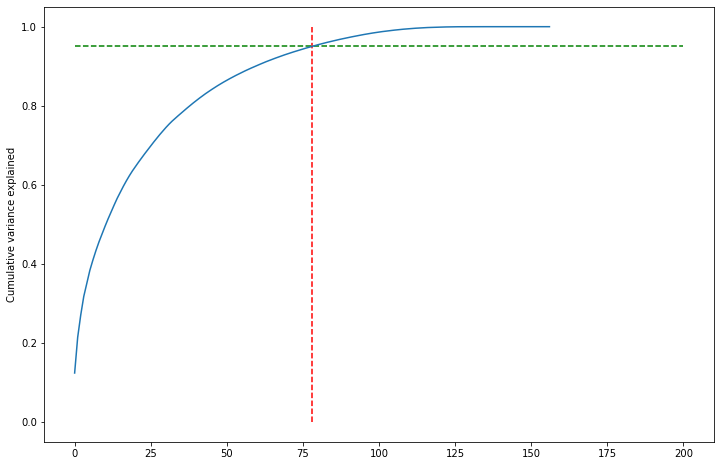

In [166]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=78, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=200, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

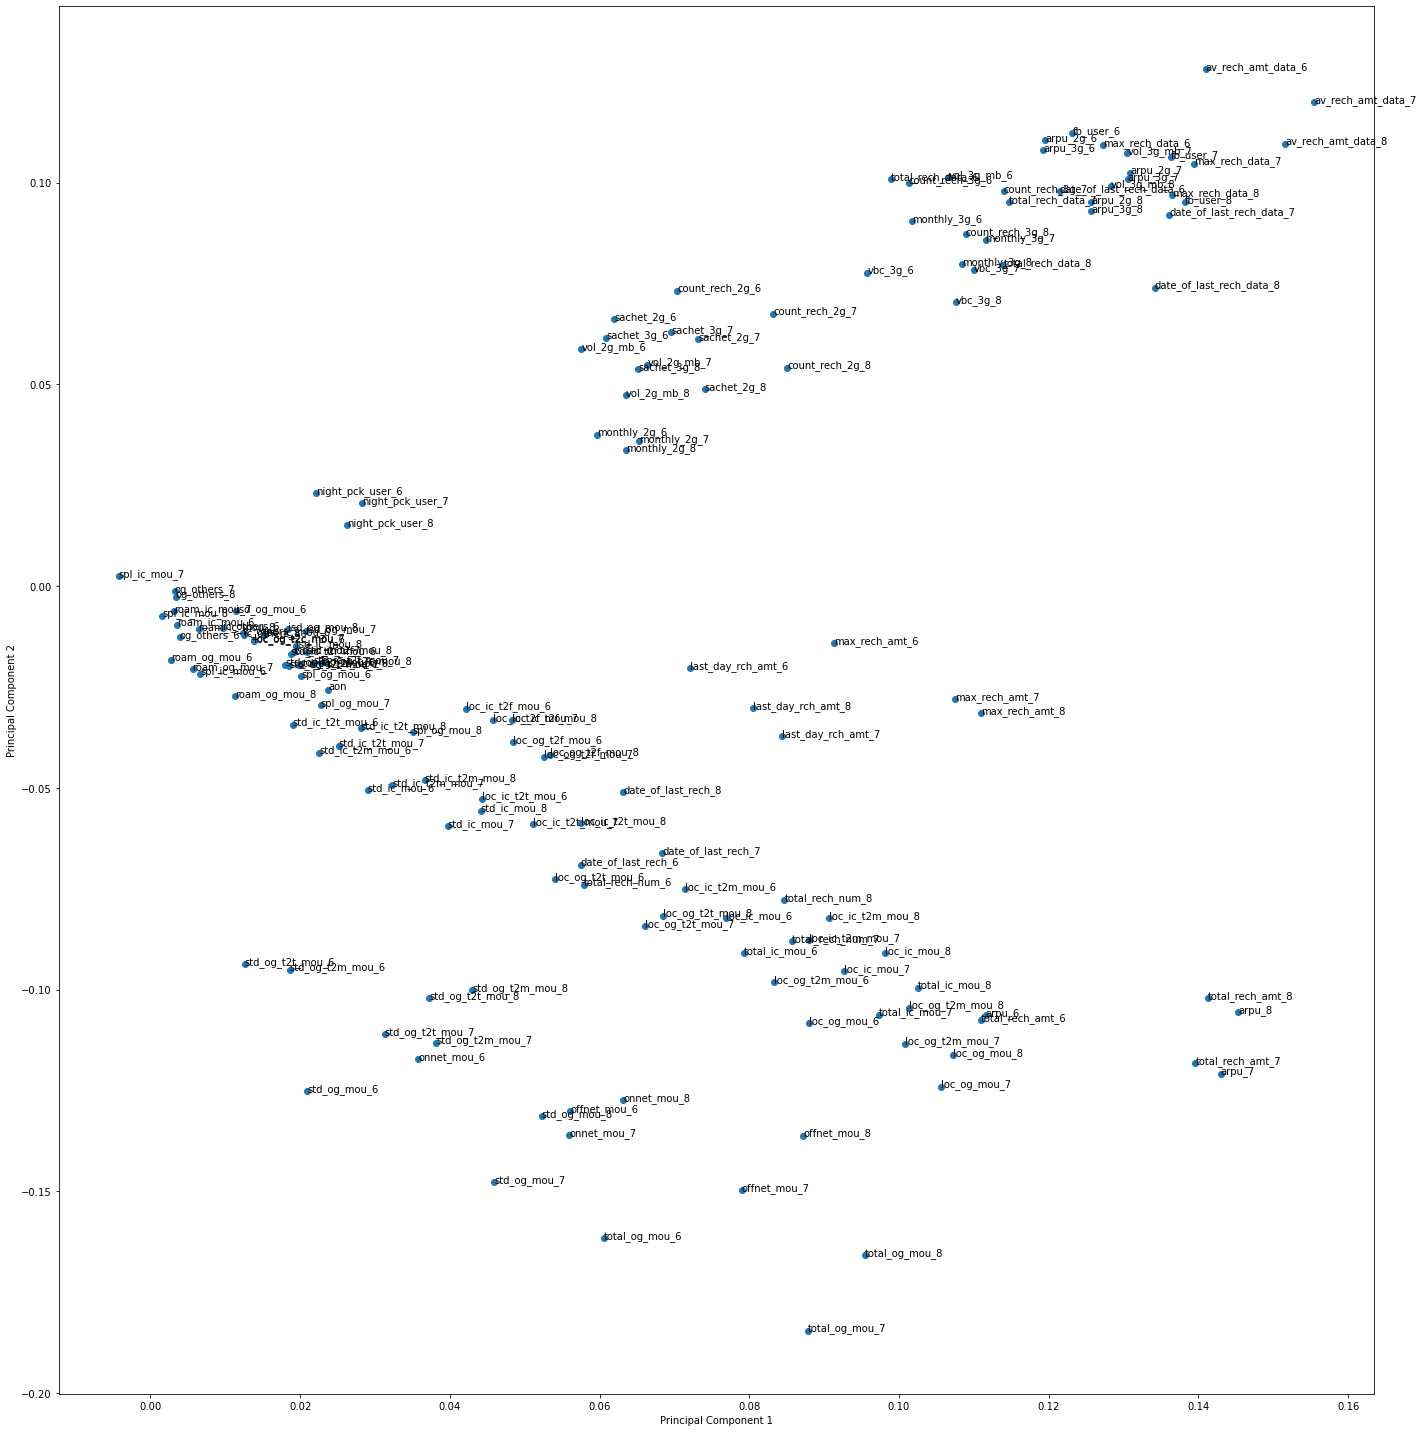

In [167]:
%matplotlib inline
fig = plt.figure(figsize = (20,20))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

### Create PCA with 78 variables which explain 95% of variance

In [168]:
pca_final = IncrementalPCA(n_components=78)

In [169]:
X_train_scaled_pca = pca_final.fit_transform(X_train_scaled)

### Logistic Regression

In [170]:
logreg_pca = LogisticRegression()

In [171]:
logreg_pca.fit(X_train_scaled_pca, y_train)

LogisticRegression()

In [172]:
y_train_pred = logreg_pca.predict(X_train_scaled_pca)

In [173]:
confusion_matrix(y_train, y_train_pred)

array([[51144, 10915],
       [ 7868, 54191]], dtype=int64)

In [174]:
accuracy_score(y_train, y_train_pred)

0.8486682028392336

In [175]:
precision_score(y_train, y_train_pred)

0.8323503210149602

In [176]:
recall_score(y_train, y_train_pred)

0.8732174221305532

In [177]:
f1_score(y_train, y_train_pred)

0.8522942633586285

### Decisin Tree Classsifier

In [178]:
dt_with_pca = DecisionTreeClassifier()

In [179]:
params = {
    "max_depth": [10,20,25,30,35],
    "min_samples_leaf": [20,50,100,500]
}

In [180]:
grid_search = GridSearchCV(estimator=dt_with_pca,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [181]:
%%time
grid_search.fit(X_train_scaled_pca, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 5min 9s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 25, 30, 35],
                         'min_samples_leaf': [20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [182]:
grid_search.best_score_

0.8597625756907405

In [183]:
dt_with_pca_best = grid_search.best_estimator_
dt_with_pca_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=20)

In [185]:
y_scaled_pca_pred = dt_with_pca_best.predict(X_train_scaled_pca)

In [186]:
confusion_matrix(y_train, y_scaled_pca_pred)

array([[56795,  5264],
       [ 5651, 56408]], dtype=int64)

In [187]:
accuracy_score(y_train, y_scaled_pca_pred)

0.9120594917739571

In [188]:
precision_score(y_train, y_scaled_pca_pred)

0.9146452198728758

In [189]:
recall_score(y_train, y_scaled_pca_pred)

0.9089414911616365

In [190]:
f1_score(y_train, y_scaled_pca_pred)

0.9117844355901108

### Random Forest Classifier

In [191]:
rf_with_pca = RandomForestClassifier()

In [192]:
params = {
    'max_depth': [10,20,25],
    'min_samples_leaf': [50,100,500],
    'n_estimators': [5, 10, 15, 25]
}

In [193]:
grid_search = GridSearchCV(estimator=rf_with_pca,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [195]:
%%time
grid_search.fit(X_train_scaled_pca, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Wall time: 5min 30s


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 25],
                         'min_samples_leaf': [50, 100, 500],
                         'n_estimators': [5, 10, 15, 25]},
             scoring='accuracy', verbose=1)

In [196]:
grid_search.best_score_

0.8749014111911588

In [197]:
rf_with_pca_best = grid_search.best_estimator_
rf_with_pca_best

RandomForestClassifier(max_depth=20, min_samples_leaf=50, n_estimators=25)

In [198]:
y_scaled_pca_pred = rf_with_pca_best.predict(X_train_scaled_pca)

In [199]:
confusion_matrix(y_train, y_scaled_pca_pred)

array([[56537,  5522],
       [ 7094, 54965]], dtype=int64)

In [200]:
accuracy_score(y_train, y_scaled_pca_pred)

0.8983547914081761

In [201]:
precision_score(y_train, y_scaled_pca_pred)

0.9087076561905864

In [202]:
recall_score(y_train, y_scaled_pca_pred)

0.8856894245798353

In [203]:
f1_score(y_train, y_scaled_pca_pred)

0.8970509033342582

### XGBClassifier

In [204]:
xgb_with_pca_model = XGBClassifier().fit(X_train_scaled_pca, y_train)

[09:39:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [205]:
y_scaled_pred = xgb_with_pca_model.predict(X_train_scaled_pca)

In [206]:
confusion_matrix(y_train, y_scaled_pred)

array([[58534,  3525],
       [ 1753, 60306]], dtype=int64)

In [207]:
accuracy_score(y_train, y_scaled_pred)

0.9574759503053546

In [208]:
precision_score(y_train, y_scaled_pred)

0.9447760492550642

In [209]:
recall_score(y_train, y_scaled_pred)

0.971752686959184

In [210]:
f1_score(y_train, y_scaled_pred)

0.9580745094924141

### Test Data

In [211]:
X_test_scaled_pca = pca_final.transform(X_test_scaled)

### Decision Tree with pca testing

In [212]:
y_test_scaled_pred = dt_with_pca_best.predict(X_test_scaled_pca)

In [213]:
frame = { 'id': test_id, 'churn_probability': y_test_scaled_pred }
result = pd.DataFrame(frame)

In [214]:
result.dtypes

id                   int64
churn_probability    int64
dtype: object

In [215]:
result.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

In [216]:
result['churn_probability'] = result['churn_probability'].astype('int')

In [217]:
result.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

In [218]:
result.to_csv('solution_dt_with_pca.csv',index=False)

### Random Forest with pca testing

In [219]:
y_test_scaled_pred = rf_with_pca_best.predict(X_test_scaled_pca)

In [220]:
frame = { 'id': test_id, 'churn_probability': y_test_scaled_pred }
result = pd.DataFrame(frame)

In [221]:
result.dtypes

id                   int64
churn_probability    int64
dtype: object

In [222]:
result.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

In [223]:
result.to_csv('solution_rf_with_pca.csv',index=False)

### XGBClassifier with PCA testing

In [224]:
y_test_scaled_pred = xgb_with_pca_model.predict(X_test_scaled_pca)

In [225]:
frame = { 'id': test_id, 'churn_probability': y_test_scaled_pred }
result = pd.DataFrame(frame)

In [226]:
result.dtypes

id                   int64
churn_probability    int64
dtype: object

In [227]:
result.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0

In [228]:
result.to_csv('solution_xgb_with_pca.csv',index=False)

### Decision Tree without PCA testing

In [229]:
y_test_scaled_pred = dec_tree_best.predict(X_test_scaled)

In [230]:
frame = { 'id': test_id, 'churn_probability': y_test_scaled_pred }
result = pd.DataFrame(frame)

In [231]:
result.dtypes

id                   int64
churn_probability    int64
dtype: object

In [232]:
result.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [233]:
result.to_csv('solution_dt_without_pca.csv',index=False)

### Random Forest without PCA testing

In [234]:
y_test_scaled_pred = rand_for_best.predict(X_test_scaled)

In [235]:
frame = { 'id': test_id, 'churn_probability': y_test_scaled_pred }
result = pd.DataFrame(frame)

In [236]:
result.dtypes

id                   int64
churn_probability    int64
dtype: object

In [237]:
result.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [238]:
result.to_csv('solution_rf_without_pca.csv',index=False)

### XGBClassifier without PCA testing

In [239]:
y_test_scaled_pred = xgb_model.predict(X_test_scaled)

In [240]:
frame = { 'id': test_id, 'churn_probability': y_test_scaled_pred }
result = pd.DataFrame(frame)

In [241]:
result.dtypes

id                   int64
churn_probability    int64
dtype: object

In [242]:
result.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [243]:
result.to_csv('solution_xgb_without_pca.csv',index=False)

### Model Analysis
* We have created different models like Logistic Regression, Decision Tree, Random Forest, XGB Classifier.
* XGB Classifier provide highest train accuaracy but test accuracy is slightly low
* Decision Tree provide approximately same train and test accuracy, so better to go with Decision Tree model

### Feature Analysis
* If the avarage revenue, 2g/3g data usage, recharge amount decreases as month passes, then there is high chance that customer will get churn
* We can clearly see from group by analysis above, as we from 6->7->8 month, for churned customers; revenue, recharge, data usage decreases steadily. For non-churn customer, these values are approximately same.